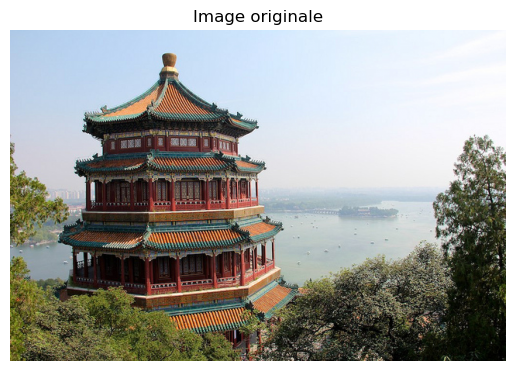

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
# Importation de l'image
from sklearn.datasets import load_sample_image

image = load_sample_image("china.jpg")
image = np.array(image, dtype=np.float64) / 255
# Affichage
plt.figure()
plt.clf()
plt.axis("off")
plt.title("Image originale")
plt.imshow(image)


In [2]:
w, h, d = original_shape = tuple(image.shape)
im_size = w*h
assert d == 3
image_array = np.reshape(image, (w * h, d))


In [3]:
cls = KMeans(n_clusters=16) # 16 Couleurs

cls.fit(image_array)

,n_clusters,16
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


[[0.71308242 0.75297969 0.74527148]
 [0.25893406 0.19387003 0.12103893]
 [0.92197991 0.94609937 0.97811223]
 [0.49492621 0.47005819 0.26379385]
 [0.80931136 0.82961689 0.85055179]
 [0.14186582 0.12766202 0.09742377]
 [0.51069842 0.52082914 0.45529173]
 [0.37735882 0.38051734 0.33536455]
 [0.72414218 0.47307181 0.33872872]
 [0.36130737 0.3495354  0.16610387]
 [0.24012403 0.26241192 0.23728956]
 [0.76483269 0.85183957 0.94951693]
 [0.87721041 0.64708102 0.47840917]
 [0.49363288 0.25120143 0.17876408]
 [0.59927219 0.63525483 0.61418949]
 [0.05359693 0.04932595 0.02676136]] (273280,)


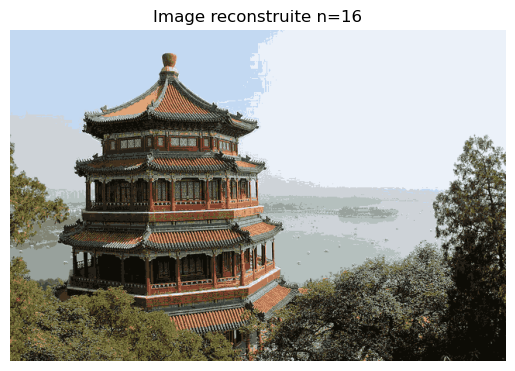

In [4]:
centers = cls.cluster_centers_
labels = cls.labels_

print(centers, labels.shape)

labels = cls.predict(image_array)

l = [centers[l] for l in labels]

img = np.reshape(l, (w, h, d))

plt.figure()
plt.clf()
plt.axis("off")
plt.title(f"Image reconstruite n={len(cls.cluster_centers_)}")
plt.imshow(img)

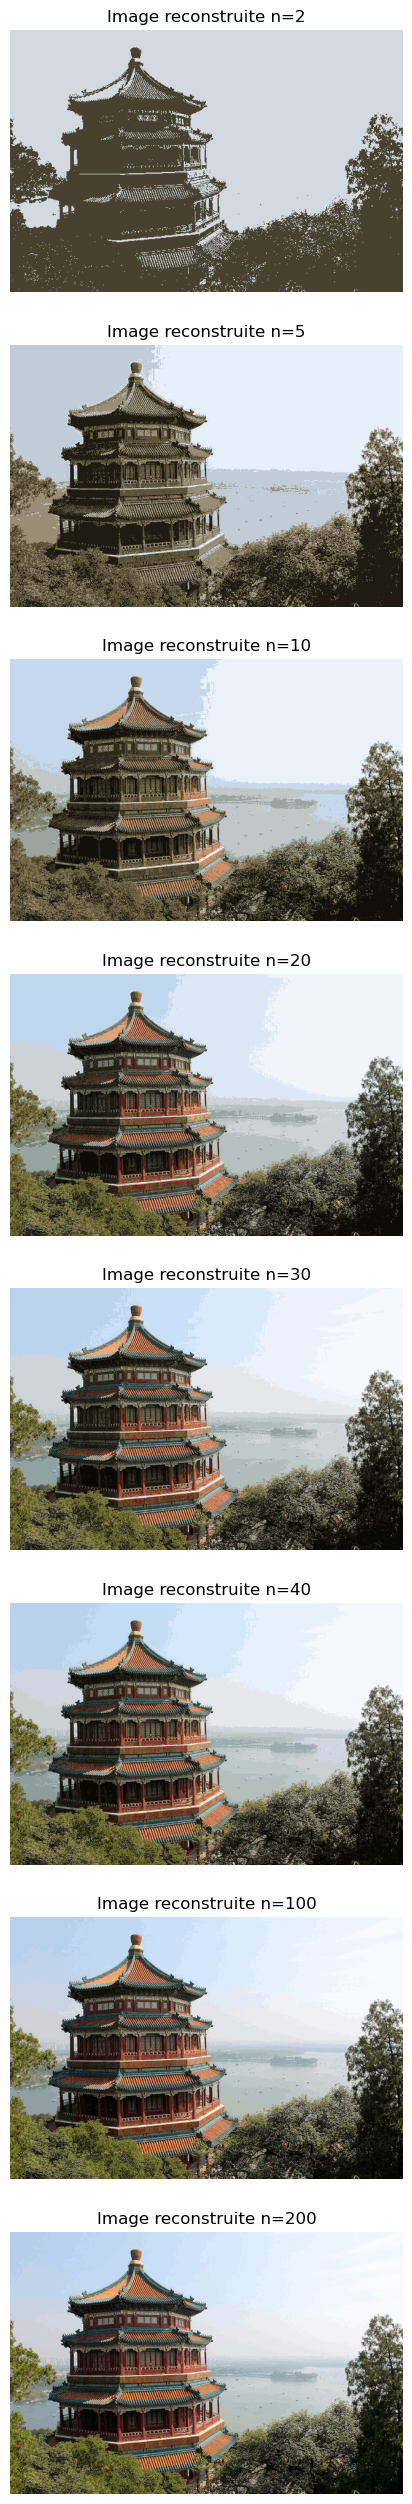

In [8]:
t=[2, 5, 10, 20, 30, 40, 100, 200]
plt.figure(figsize=(64, 32))
for i in range(len(t)):
    ax = plt.subplot(len(t), 1, i+1)
    cls = KMeans(n_clusters=t[i]) # 16 Couleurs

    cls.fit(image_array)

    labels = cls.predict(image_array)

    l = [cls.cluster_centers_[l] for l in labels]

    img = np.reshape(l, (w, h, d))

    
    ax.set_axis_off()
    ax.set_title(f"Image reconstruite n={len(cls.cluster_centers_)}")
    ax.imshow(img)